In [8]:
##Loading the dataset and examining its structure
import pandas as pd
data = pd.read_csv("Earnings Manipulation 220.csv")
data.head()

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,3/31/2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,3/31/2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,3/31/2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,3/31/2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,3/31/2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


In [10]:
data.describe()

,Company Name,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,110.500000,1.523289,1.103023,1.353839,1.217928,1.030118,1.413396,-0.016890,1.108600,0.177273
std,63.652704,2.828754,3.453701,3.903195,1.223330,0.354056,3.383294,0.128853,1.018647,0.382770
min,1.000000,0.015096,-20.811849,-4.712397,0.027685,0.068823,0.092890,-0.592258,0.000000,0.000000
25%,55.750000,0.917511,0.932569,0.785517,0.962646,0.930413,0.899463,-0.071370,0.913937,0.000000
50%,110.500000,1.044853,1.000000,1.015498,1.084642,1.002396,1.011575,-0.014814,1.007465,0.000000
75%,165.250000,1.300227,1.094988,1.192857,1.243118,1.087991,1.204553,0.028612,1.108551,0.000000
max,220.000000,36.291185,46.466667,52.886734,13.081433,4.229119,49.301781,0.717842,13.058559,1.000000


In [51]:
## How many cases of manipulators versus non-manipulators are there in the dataset? Draw a bar plot to depict.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np


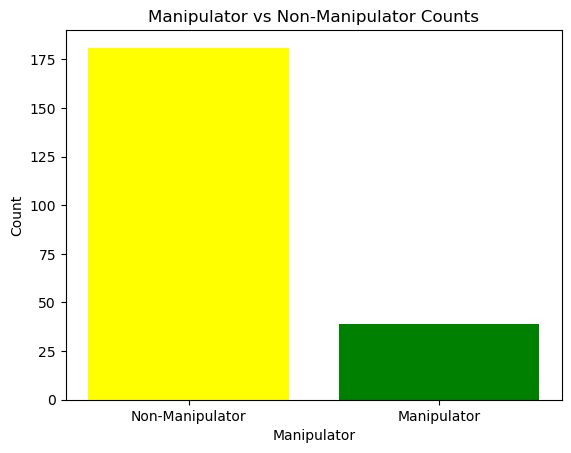

In [53]:
##  Question : How many cases of manipulators versus non-manipulators are there in the dataset? Draw a bar plot to depict.
# Count the number of manipulators and non-manipulators
manipulator_counts = data['MANIPULATOR'].value_counts()

# Plotting the counts
plt.bar(manipulator_counts.index, manipulator_counts.values, color=['YELLOW', 'GREEN'])
plt.xlabel('Manipulator')
plt.ylabel('Count')
plt.title('Manipulator vs Non-Manipulator Counts')
plt.xticks([0, 1], ['Non-Manipulator', 'Manipulator'])
plt.show()

In [54]:
## Question : Create a 80:20 partition, and find how many positives are present in the test data.
# Separate features and target variable
X = data.drop('MANIPULATOR', axis=1)
y = data['MANIPULATOR']

# Create an 80:20 partition for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count the number of positives (manipulators) in the test data
positives_test = y_test.sum()
print("Number of positives in test data:", positives_test)

Number of positives in test data: 6


In [ ]:

# Upsample the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gradientboost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Grid search parameters
params = {
    'Naive Bayes': {},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Adaboost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradientboost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
}

# Train and evaluate models
best_model = None
best_recall = 0

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    clf = GridSearchCV(pipeline, params[name], scoring='recall', cv=5)
    clf.fit(X_train_balanced, y_train_balanced)
    
    y_pred = clf.predict(X_test)
    recall = clf.best_score_
    if recall > best_recall:
        best_recall = recall
        best_model = clf.best_estimator_
    
    print(f"\n{name}:")
    print("Best Parameters:", clf.best_params_)
    print("Recall:", recall)
    print(classification_report(y_test, y_pred))

print("\nBest Model (based on recall):", best_model.named_steps[model.__class__.__name__])


In [ ]:
## Question : Comment on which are the most important features for predicting the manipulators.

# Fit the best model on the balanced data
best_model.fit(X_train_balanced, y_train_balanced)

# Extract feature importances if applicable
if hasattr(best_model.named_steps[model.__class__.__name__], 'feature_importances_'):
    feature_importances = best_model.named_steps[model.__class__.__name__].feature_importances_
    feature_names = X_train.columns
    importance_dict = dict(zip(feature_names, feature_importances))
    
    # Sort features by importance
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    # Print the top N important features
    print("Top 5 important features:")
    for feature, importance in sorted_importance[:5]:
        print(f"{feature}: {importance}")
else:
    print("This model does not provide feature importances.")



In [ ]:
# Question : The number of cases of manipulators are very less compared to non-manipulators. Use downsampling technique to create a balance dataset.

from imblearn.under_sampling import RandomUnderSampler

# Downsample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced_down, y_train_balanced_down = undersampler.fit_resample(X_train, y_train)

# Train and evaluate models on downsampled data
best_model_down = None
best_recall_down = 0

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    clf = GridSearchCV(pipeline, params[name], scoring='recall', cv=5)
    clf.fit(X_train_balanced_down, y_train_balanced_down)
    
    y_pred = clf.predict(X_test)
    recall = clf.best_score_
    if recall > best_recall_down:
        best_recall_down = recall
        best_model_down = clf.best_estimator_
    
    print(f"\n{name}:")
    print("Best Parameters:", clf.best_params_)
    print("Recall:", recall)
    print(classification_report(y_test, y_pred))

print("\nBest Model with downsampling (based on recall):", best_model_down.named_steps[model.__class__.__name__])


In [ ]:
## Compare the results of using both upsampling and downsampling techniques. Report the best model of all the models
## I will consider the recall scores of the best models obtained from both upsampling and downsampling techniques.

# Compare recall scores of best models from both techniques
print("Recall with upsampling:", best_recall)
print("Recall with downsampling:", best_recall_down)

# Report the best model overall
if best_recall > best_recall_down:
    print("\nBest Model overall (based on recall):", best_model.named_steps[model.__class__.__name__])
else:
    print("\nBest Model overall (based on recall):", best_model_down.named_steps[model.__class__.__name__])
